In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('training_titanic_x_y_train.csv')

In [3]:
df.drop(['Cabin', 'Ticket','Name'],axis = 1, inplace = True)
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,NaN,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


In [5]:
def changes(df):
    df['Embarked'] = df['Embarked'].replace({'S': 0, 'Q': 1, 'C':2})
    df['Age'].fillna(df['Age'].median(), inplace = True)
    df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})
    return df

In [6]:
import matplotlib.pyplot as plt
df1 = changes(df)
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,29.0,1,0,26.000,0.0,1
1,3,1,29.0,0,0,8.050,0.0,0
2,2,1,39.0,0,0,26.000,0.0,0
3,3,0,29.0,0,4,21.075,0.0,0
4,3,1,25.0,0,0,7.050,0.0,0


Minimum Age: 0.67
Maximum Age: 80.0


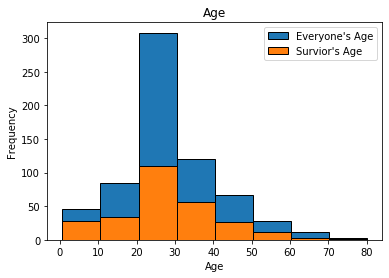

In [7]:
df_s = df[df['Survived'] == 1]
plt.hist(df1['Age'], bins = 8, edgecolor = 'black', label = 'Everyone\'s Age')
plt.hist(df_s['Age'], bins = 8, edgecolor = 'black', label = 'Survior\'s Age')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
print('Minimum Age:',df1['Age'].min())
print('Maximum Age:',df1['Age'].max())
plt.legend(loc='upper right')
plt.show()

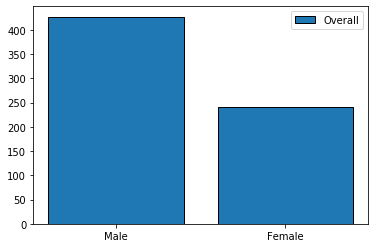

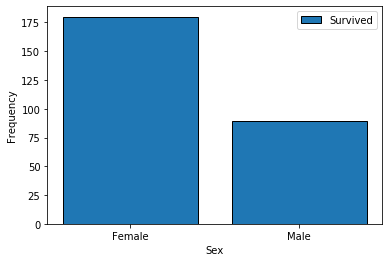

In [8]:
a = df1['Sex'].value_counts()
plt.bar(['Male','Female'], a, edgecolor = 'black', label = 'Overall')
plt.legend(loc = 'upper right')
plt.show()
b = df_s['Sex'].value_counts()
plt.bar(['Female','Male'], b, edgecolor = 'black',label = 'Survived')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()


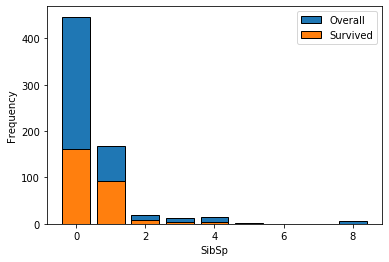

In [9]:
a = df1['SibSp'].value_counts()
plt.bar(a.index, a, edgecolor = 'black', label = 'Overall')
b = df_s['SibSp'].value_counts()
plt.bar(b.index, b, edgecolor = 'black',label = 'Survived')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

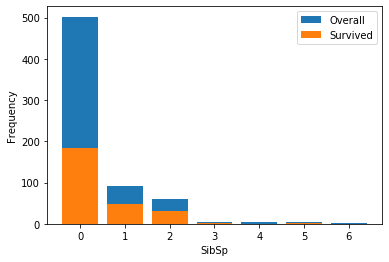

In [10]:
a = df1['Parch'].value_counts()
plt.bar(a.index, a, label = 'Overall')
b = df_s['Parch'].value_counts()
plt.bar(b.index, b,label = 'Survived')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

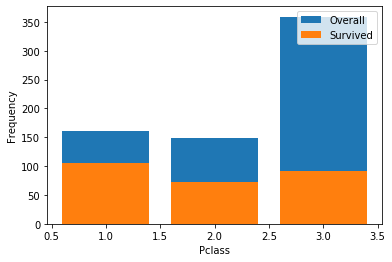

In [11]:
a = df1['Pclass'].value_counts()
plt.bar(a.index, a, label = 'Overall')
b = df_s['Pclass'].value_counts()
plt.bar(b.index, b,label = 'Survived')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
def transform(df):
    df['Age'].fillna(df['Age'].median(), inplace = True)    
    df['Embarked'].fillna(df['Embarked'].median(), inplace = True)
    df['Age'] = (df['Age'] - df['Age'].min())/(df['Age'].max() - df['Age'].min())
    df['Fare'] = (df['Fare'] - df['Fare'].min())/(df['Fare'].max() - df['Fare'].min())
    df['Embarked'] = df['Embarked']/2
    df['Parch'] = (df['Parch']/6)
    df['Pclass'] = (df['Pclass']-1)/2
    return df

In [14]:
df_train= transform(df1)

In [15]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.5,0,0.357116,1,0.000000,0.050749,0.0,1
1,1.0,1,0.357116,0,0.000000,0.015713,0.0,0
2,0.5,1,0.483172,0,0.000000,0.050749,0.0,0
3,1.0,0,0.357116,0,0.666667,0.041136,0.0,0
4,1.0,1,0.306694,0,0.000000,0.013761,0.0,0


In [16]:
data = df_train.to_numpy()
data.shape

(668, 8)

In [17]:
X = data[:, :-1]
X.shape

(668, 7)

In [18]:
y = data[:, -1]
y.shape

(668,)

In [19]:
def append_ones(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)

In [20]:
X_train = append_ones(X)
X_train.shape

(668, 8)

In [21]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [22]:
def cost(h, theta):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()

In [23]:
def gd(X, y, alpha, num_int):
    M, N = X.shape
    theta = np.zeros(N)
    descent, thetas= [],[]
    for i in range(num_int):
        h = sigmoid(np.dot(X, theta))
        gradients = np.dot(X.T, (h - y))/M
        theta -= alpha * gradients
        h = sigmoid(np.dot(X, theta))
        loss = cost(h, theta)
        if i % 10000== 0:
            descent.append(loss)
            print(f'cost: {loss} \t', f'weights: {theta} \t')
            thetas.append(theta)
    return descent,thetas

In [24]:
descent,thetas = gd(X_train, y, 0.01,100000)

cost: 0.6924682673538557 	 weights: [-9.73053892e-04 -1.32485030e-03 -1.86377246e-03 -4.20003306e-04
 -6.66167665e-04 -2.24550898e-05  4.52080487e-05  8.98203593e-05] 	
cost: 0.4742127441590975 	 weights: [ 1.77413889 -1.34431139 -2.26509624 -0.18096269 -0.18518338  0.03221007
  0.41728209  0.61414127] 	
cost: 0.4651548904902983 	 weights: [ 2.37861006 -1.65414766 -2.46913296 -0.74920513 -0.23100764 -0.13143363
  0.50880413  0.51658047] 	
cost: 0.46084502901466257 	 weights: [ 2.72719332 -1.79019361 -2.53247945 -1.25522778 -0.25145268 -0.28215296
  0.54949296  0.46672278] 	
cost: 0.45835932424836656 	 weights: [ 2.97296745 -1.87415089 -2.56718782 -1.65748358 -0.26453004 -0.40532372
  0.5736454   0.43990655] 	
cost: 0.4568787390884926 	 weights: [ 3.15887096 -1.9349175  -2.59271774 -1.97056788 -0.27416707 -0.50380891
  0.58958467  0.42277265] 	
cost: 0.4559822008205276 	 weights: [ 3.30314282 -1.98156197 -2.61333278 -2.21406084 -0.28160884 -0.58241987
  0.60030589  0.41067006] 	
cost: 0

In [25]:
theta=thetas[-1]

In [26]:
def prediction(X_train, theta):
    h = sigmoid(np.dot(X_train, theta))
    return h.round()

In [27]:
from sklearn.metrics import confusion_matrix
Y_predict = prediction(X_train, theta)
confusion_matrix(y, Y_predict)

array([[336,  63],
       [ 77, 192]], dtype=int64)

In [28]:
df3 = pd.read_csv('test_titanic_x_test.csv')
df3.drop(['Cabin', 'Ticket','Name'],axis = 1, inplace = True)
df3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,male,8.0,1,1,36.7500,S
1,1,female,49.0,0,0,25.9292,S
2,3,male,NaN,0,0,7.7375,Q
3,2,female,24.0,2,1,27.0000,S
4,1,male,36.0,0,0,26.2875,S


In [29]:
df2 = changes(df3)
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,8.0,1,1,36.7500,0.0
1,1,0,49.0,0,0,25.9292,0.0
2,3,1,27.0,0,0,7.7375,1.0
3,2,0,24.0,2,1,27.0000,0.0
4,1,1,36.0,0,0,26.2875,0.0


In [31]:
df_test= transform(df2)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.5,1,0.107396,1,0.166667,0.071731,0.0
1,0.0,0,0.688297,0,0.000000,0.050610,0.0
2,1.0,1,0.376594,0,0.000000,0.015103,0.5
3,0.5,0,0.334089,2,0.166667,0.052700,0.0
4,0.0,1,0.504109,0,0.000000,0.051310,0.0


In [32]:
X_test = df_test.to_numpy()
X_test.shape

(223, 7)

In [33]:
X_test = append_ones(X_test)
X_test.shape

(223, 8)

In [35]:
Y_predict = prediction(X_test, theta)

In [38]:
Y_predict

array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0.])

In [39]:
np.savetxt('Y_predict_new.csv', Y_predict, fmt ='%.1f')